<a href="https://colab.research.google.com/github/xiraphone/Thinkful-Capstone-3/blob/main/Bechdel_Capstone_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final Capstone Project by Xira Doctor

In 2007, Warner Bros. President of Production, Jeff Robinov, decreed, “[we are no longer doing movies with women in the lead](https://deadline.com/2007/10/warners-robinoff-gets-in-catfight-with-girls-3362/)” stating their underperformance at the box office as the reason. **In my final capstone, I want to examine whether this sexist statement has any statistical basis.**

My dataset comes from [Kaggle](https://www.kaggle.com/mathurinache/women-in-movies). It lists 1,794 films from 1970 to 2013 on whether they pass the Bechdel test or not. The Bechdel test was developed by cartoonist Alison Bechdel in 1985 and is one of the most enduring tools to measure Hollywood’s gender bias. Three criteria must be met to pass the Bechdel test: there must be two named women characters, they must speak to each other at some point, and the conversation is not about a man.  

Using this dataset, I intend to analyze the relationship between the presence of women in a film and that film’s budget and gross revenue. I will conduct a z-test on binary variables (Pass or Fail) to determine if there is a significant difference between the budget, domestic gross, international gross, and profit of films that Pass the Bechdel Test and films that Fail the Bechdel test.

This analysis could be used by filmmakers and studios to determine whether investing time and money in films that feature women in prominent speaking roles is a wise financial decision. 


In [ ]:
#import all libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

import matplotlib.pyplot as plt
import math

from statsmodels.graphics.mosaicplot import mosaic

# Suppress warnings (warnings do not prevent the code from executing)
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


I will be using [this](https://www.kaggle.com/mathurinache/women-in-movies) dataset from Kaggle. 

The dataset contains films from 1970 to 2013. I will be using the Movies_EDA.csv, which has 15 columns.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/CapstoneBechdel/Movies_EDA.csv')

In [ ]:
df.head()

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013,domgross_2013,intgross_2013,period code,decade code
0,2013,tt1711425,21 & Over,notalk,notalk,FAIL,13000000,25682380.0,42195766.0,2013FAIL,13000000,25682380.0,42195766.0,1.0,1.0
1,2012,tt1343727,Dredd 3D,ok-disagree,ok,PASS,45000000,13414714.0,40868994.0,2012PASS,45658735,13611086.0,41467257.0,1.0,1.0
2,2013,tt2024544,12 Years a Slave,notalk-disagree,notalk,FAIL,20000000,53107035.0,158607035.0,2013FAIL,20000000,53107035.0,158607035.0,1.0,1.0
3,2013,tt1272878,2 Guns,notalk,notalk,FAIL,61000000,75612460.0,132493015.0,2013FAIL,61000000,75612460.0,132493015.0,1.0,1.0
4,2013,tt0453562,42,men,men,FAIL,40000000,95020213.0,95020213.0,2013FAIL,40000000,95020213.0,95020213.0,1.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1794 entries, 0 to 1793
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           1794 non-null   int64  
 1   imdb           1794 non-null   object 
 2   title          1794 non-null   object 
 3   test           1794 non-null   object 
 4   clean_test     1794 non-null   object 
 5   binary         1794 non-null   object 
 6   budget         1794 non-null   int64  
 7   domgross       1777 non-null   float64
 8   intgross       1783 non-null   float64
 9   code           1794 non-null   object 
 10  budget_2013    1794 non-null   int64  
 11  domgross_2013  1776 non-null   float64
 12  intgross_2013  1783 non-null   float64
 13  period code    1615 non-null   float64
 14  decade code    1615 non-null   float64
dtypes: float64(6), int64(3), object(6)
memory usage: 210.4+ KB


# General Cleaning

Finding and removing any null values

In [ ]:
df.isnull()

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013,domgross_2013,intgross_2013,period code,decade code
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
1790,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
1791,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
1792,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True


Drop 'period code' and 'decade code' columns because they have missing values

In [ ]:
# Delete the 'period code' and 'decade code' columns and store the new DataFrame in a new variable
df_changed = df.drop(['period code', 'decade code'], axis=1)

print('The columns of the new DataFrame')
print(df_changed.columns)

print('The columns of the original DataFrame')
print(df.columns)

# Alternatively, modify the existing DataFrame by setting the `inplace` parameter to `True`
df.drop(['period code', 'decade code'], axis=1, inplace=True)
print('The columns of the DataFrame after deleting inplace')
print(df.columns)

The columns of the new DataFrame
Index(['year', 'imdb', 'title', 'test', 'clean_test', 'binary', 'budget',
       'domgross', 'intgross', 'code', 'budget_2013', 'domgross_2013',
       'intgross_2013'],
      dtype='object')
The columns of the original DataFrame
Index(['year', 'imdb', 'title', 'test', 'clean_test', 'binary', 'budget',
       'domgross', 'intgross', 'code', 'budget_2013', 'domgross_2013',
       'intgross_2013', 'period code', 'decade code'],
      dtype='object')
The columns of the DataFrame after deleting inplace
Index(['year', 'imdb', 'title', 'test', 'clean_test', 'binary', 'budget',
       'domgross', 'intgross', 'code', 'budget_2013', 'domgross_2013',
       'intgross_2013'],
      dtype='object')


Drop 'test' column - will not be using this for analysis

In [ ]:
# Delete the 'test' columns and store the new DataFrame in a new variable
df_changed = df.drop(['test'], axis=1)

print('The columns of the new DataFrame')
print(df_changed.columns)

print('The columns of the original DataFrame')
print(df.columns)

# Alternatively, modify the existing DataFrame by setting the `inplace` parameter to `True`
df.drop(['test'], axis=1, inplace=True)
print('The columns of the DataFrame after deleting inplace')
print(df.columns)

The columns of the new DataFrame
Index(['year', 'imdb', 'title', 'clean_test', 'binary', 'budget', 'domgross',
       'intgross', 'code', 'budget_2013', 'domgross_2013', 'intgross_2013'],
      dtype='object')
The columns of the original DataFrame
Index(['year', 'imdb', 'title', 'test', 'clean_test', 'binary', 'budget',
       'domgross', 'intgross', 'code', 'budget_2013', 'domgross_2013',
       'intgross_2013'],
      dtype='object')
The columns of the DataFrame after deleting inplace
Index(['year', 'imdb', 'title', 'clean_test', 'binary', 'budget', 'domgross',
       'intgross', 'code', 'budget_2013', 'domgross_2013', 'intgross_2013'],
      dtype='object')


Dropping the budget, domgross, intgross columns because I will be using budget_2013, domgross_2013, and intgross_2013 for analysis since they have been adjusted for 2013 inflation

In [ ]:
# Delete the 'budget', 'domgross', 'intgross' columns and store the new DataFrame in a new variable
df_changed = df.drop(['budget', 'domgross', 'intgross'], axis=1)

print('The columns of the new DataFrame')
print(df_changed.columns)

print('The columns of the original DataFrame')
print(df.columns)

# Alternatively, modify the existing DataFrame by setting the `inplace` parameter to `True`
df.drop(['budget', 'domgross', 'intgross'], axis=1, inplace=True)
print('The columns of the DataFrame after deleting inplace')
print(df.columns)

The columns of the new DataFrame
Index(['year', 'imdb', 'title', 'clean_test', 'binary', 'code', 'budget_2013',
       'domgross_2013', 'intgross_2013'],
      dtype='object')
The columns of the original DataFrame
Index(['year', 'imdb', 'title', 'clean_test', 'binary', 'budget', 'domgross',
       'intgross', 'code', 'budget_2013', 'domgross_2013', 'intgross_2013'],
      dtype='object')
The columns of the DataFrame after deleting inplace
Index(['year', 'imdb', 'title', 'clean_test', 'binary', 'code', 'budget_2013',
       'domgross_2013', 'intgross_2013'],
      dtype='object')


Turn all NaN values in domgross_2013 and intgross_2013 into 0s and convert into integer

In [ ]:
df['domgross_2013'] = df['domgross_2013'].fillna(0).astype(int)

print(df)
print(df.dtypes)

      year       imdb  ... domgross_2013 intgross_2013
0     2013  tt1711425  ...      25682380    42195766.0
1     2012  tt1343727  ...      13611086    41467257.0
2     2013  tt2024544  ...      53107035   158607035.0
3     2013  tt1272878  ...      75612460   132493015.0
4     2013  tt0453562  ...      95020213    95020213.0
...    ...        ...  ...           ...           ...
1789  1971  tt0067741  ...     404702718   616827003.0
1790  1971  tt0067800  ...      59412143    64760273.0
1791  1971  tt0067116  ...     236848653   236848653.0
1792  1971  tt0067992  ...      23018057    23018057.0
1793  1970  tt0065466  ...      53978683    53978683.0

[1794 rows x 9 columns]
year               int64
imdb              object
title             object
clean_test        object
binary            object
code              object
budget_2013        int64
domgross_2013      int64
intgross_2013    float64
dtype: object


In [ ]:
df['intgross_2013'] = df['intgross_2013'].fillna(0).astype(int)

print(df)
print(df.dtypes)

      year       imdb  ... domgross_2013 intgross_2013
0     2013  tt1711425  ...      25682380      42195766
1     2012  tt1343727  ...      13611086      41467257
2     2013  tt2024544  ...      53107035     158607035
3     2013  tt1272878  ...      75612460     132493015
4     2013  tt0453562  ...      95020213      95020213
...    ...        ...  ...           ...           ...
1789  1971  tt0067741  ...     404702718     616827003
1790  1971  tt0067800  ...      59412143      64760273
1791  1971  tt0067116  ...     236848653     236848653
1792  1971  tt0067992  ...      23018057      23018057
1793  1970  tt0065466  ...      53978683      53978683

[1794 rows x 9 columns]
year              int64
imdb             object
title            object
clean_test       object
binary           object
code             object
budget_2013       int64
domgross_2013     int64
intgross_2013     int64
dtype: object


In [ ]:
df.isnull()

,year,imdb,title,clean_test,binary,code,budget_2013,domgross_2013,intgross_2013
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1789,False,False,False,False,False,False,False,False,False
1790,False,False,False,False,False,False,False,False,False
1791,False,False,False,False,False,False,False,False,False
1792,False,False,False,False,False,False,False,False,False


No null values remain


In [ ]:
df

,year,imdb,title,clean_test,binary,code,budget_2013,domgross_2013,intgross_2013
0,2013,tt1711425,21 & Over,notalk,FAIL,2013FAIL,13000000,25682380,42195766
1,2012,tt1343727,Dredd 3D,ok,PASS,2012PASS,45658735,13611086,41467257
2,2013,tt2024544,12 Years a Slave,notalk,FAIL,2013FAIL,20000000,53107035,158607035
3,2013,tt1272878,2 Guns,notalk,FAIL,2013FAIL,61000000,75612460,132493015
4,2013,tt0453562,42,men,FAIL,2013FAIL,40000000,95020213,95020213
...,...,...,...,...,...,...,...,...,...
1789,1971,tt0067741,Shaft,notalk,FAIL,1971FAIL,305063707,404702718,616827003
1790,1971,tt0067800,Straw Dogs,notalk,FAIL,1971FAIL,143862856,59412143,64760273
1791,1971,tt0067116,The French Connection,notalk,FAIL,1971FAIL,12659931,236848653,236848653
1792,1971,tt0067992,Willy Wonka & the Chocolate Factory,men,FAIL,1971FAIL,17263543,23018057,23018057


I will only be using the 'binary' column to determine if films pass or fail the Bechdel test. However, the categorization of why films fail is important so I want to keep the 'clean_test' column and remove all 'dubious' values

In [ ]:
df = df[df.clean_test != 'dubious']
df

,year,imdb,title,clean_test,binary,code,budget_2013,domgross_2013,intgross_2013
0,2013,tt1711425,21 & Over,notalk,FAIL,2013FAIL,13000000,25682380,42195766
1,2012,tt1343727,Dredd 3D,ok,PASS,2012PASS,45658735,13611086,41467257
2,2013,tt2024544,12 Years a Slave,notalk,FAIL,2013FAIL,20000000,53107035,158607035
3,2013,tt1272878,2 Guns,notalk,FAIL,2013FAIL,61000000,75612460,132493015
4,2013,tt0453562,42,men,FAIL,2013FAIL,40000000,95020213,95020213
...,...,...,...,...,...,...,...,...,...
1789,1971,tt0067741,Shaft,notalk,FAIL,1971FAIL,305063707,404702718,616827003
1790,1971,tt0067800,Straw Dogs,notalk,FAIL,1971FAIL,143862856,59412143,64760273
1791,1971,tt0067116,The French Connection,notalk,FAIL,1971FAIL,12659931,236848653,236848653
1792,1971,tt0067992,Willy Wonka & the Chocolate Factory,men,FAIL,1971FAIL,17263543,23018057,23018057


Create the 'profit' column

In [ ]:
df = df.assign(profit = (df.domgross_2013 + df.intgross_2013) - (df.budget_2013))
df.head()

,year,imdb,title,clean_test,binary,code,budget_2013,domgross_2013,intgross_2013,profit
0,2013,tt1711425,21 & Over,notalk,FAIL,2013FAIL,13000000,25682380,42195766,54878146
1,2012,tt1343727,Dredd 3D,ok,PASS,2012PASS,45658735,13611086,41467257,9419608
2,2013,tt2024544,12 Years a Slave,notalk,FAIL,2013FAIL,20000000,53107035,158607035,191714070
3,2013,tt1272878,2 Guns,notalk,FAIL,2013FAIL,61000000,75612460,132493015,147105475
4,2013,tt0453562,42,men,FAIL,2013FAIL,40000000,95020213,95020213,150040426


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1652 entries, 0 to 1793
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           1652 non-null   int64 
 1   imdb           1652 non-null   object
 2   title          1652 non-null   object
 3   clean_test     1652 non-null   object
 4   binary         1652 non-null   object
 5   code           1652 non-null   object
 6   budget_2013    1652 non-null   int64 
 7   domgross_2013  1652 non-null   int64 
 8   intgross_2013  1652 non-null   int64 
 9   profit         1652 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 142.0+ KB


# Exploratory Data Analysis

Group by year and find out how many films were released each year.

How many years are in the dataset?

In [ ]:
year_counts = df['year'].value_counts()

year_counts.nunique()

30

In [ ]:
year_counts.sort_values()

1970      1
1972      3
1975      4
1971      5
1973      5
1979      5
1983      5
1974      7
1977      7
1978      7
1986      8
1976      8
1985      9
1981      9
1987     10
1991     11
1982     11
1980     11
1984     13
1989     14
1990     14
1993     15
1988     19
1992     19
1994     26
1995     34
1996     39
1997     48
1999     49
1998     58
2003     59
2000     60
2001     60
2007     68
2002     77
2004     77
2012     78
2006     81
2013     90
2005     94
2008     94
2011    111
2009    113
2010    116
Name: year, dtype: int64

Explore distribution over the years

Text(0.5, 1.0, 'Number of movies by year (1970-2013)')

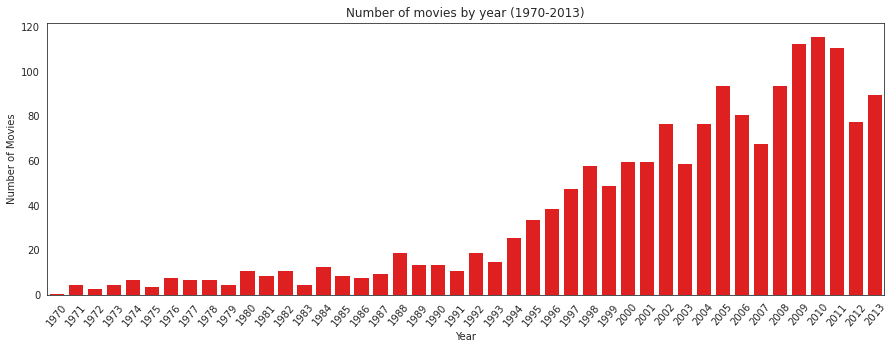

In [ ]:
values = df['year'].value_counts().sort_values(ascending=False)
labels = values.index

clrs=["red"]

sns.set_style("white")
plt.figure(figsize = (15,5))
sns.barplot(y=values, x=labels, palette=clrs)
plt.xticks(rotation=50)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of movies by year (1970-2013)')

Majority of the films in the dataset were released after 1998

Now see how many films were released that passed/failed each year

Split the movies that fail and the movies that passed into two separate dataframes

In [ ]:
fail_df = df.loc[df['binary'] == 'FAIL']
pass_df = df.loc[df['binary'] == 'PASS']

In [ ]:
fail_df

,year,imdb,title,clean_test,binary,code,budget_2013,domgross_2013,intgross_2013,profit
0,2013,tt1711425,21 & Over,notalk,FAIL,2013FAIL,13000000,25682380,42195766,54878146
2,2013,tt2024544,12 Years a Slave,notalk,FAIL,2013FAIL,20000000,53107035,158607035,191714070
3,2013,tt1272878,2 Guns,notalk,FAIL,2013FAIL,61000000,75612460,132493015,147105475
4,2013,tt0453562,42,men,FAIL,2013FAIL,40000000,95020213,95020213,150040426
5,2013,tt1335975,47 Ronin,men,FAIL,2013FAIL,225000000,38362475,145803842,-40833683
...,...,...,...,...,...,...,...,...,...,...
1788,1971,tt0067065,Escape from the Planet of the Apes,notalk,FAIL,1971FAIL,14386286,70780525,70780525,127174764
1789,1971,tt0067741,Shaft,notalk,FAIL,1971FAIL,305063707,404702718,616827003,716466014
1790,1971,tt0067800,Straw Dogs,notalk,FAIL,1971FAIL,143862856,59412143,64760273,-19690440
1791,1971,tt0067116,The French Connection,notalk,FAIL,1971FAIL,12659931,236848653,236848653,461037375


In [ ]:
pass_df

,year,imdb,title,clean_test,binary,code,budget_2013,domgross_2013,intgross_2013,profit
1,2012,tt1343727,Dredd 3D,ok,PASS,2012PASS,45658735,13611086,41467257,9419608
7,2013,tt2194499,About Time,ok,PASS,2013PASS,12000000,15323921,87324746,90648667
8,2013,tt1814621,Admission,ok,PASS,2013PASS,13000000,18007317,18007317,23014634
10,2013,tt1800241,American Hustle,ok,PASS,2013PASS,40000000,148430908,249484909,357915817
11,2013,tt1322269,August: Osage County,ok,PASS,2013PASS,25000000,37304874,50304874,62609748
...,...,...,...,...,...,...,...,...,...,...
1773,1974,tt0071222,Black Christmas,ok,PASS,1974PASS,42513535,76693179,76693179,110872823
1776,1974,tt0071562,The Godfather: Part II,ok,PASS,1974PASS,61408439,270669505,270669505,479930571
1783,1973,tt0070047,The Exorcist,ok,PASS,1973PASS,62926730,1074306128,2111900435,3123279833
1786,1972,tt0069089,Pink Flamingos,ok,PASS,1972PASS,66866,2305762,2305762,4544658


Explore distribution of films that failed the Bechdel test over the years

In [ ]:
bechdel_counts = df['binary'].value_counts()

bechdel_counts

FAIL    849
PASS    803
Name: binary, dtype: int64

In [ ]:
bechdel_pass_counts = pass_df['year'].value_counts()
bechdel_fail_counts = fail_df['year'].value_counts()

print('PASS')
print(bechdel_pass_counts)
print('=========')
print('FAIL')
print(bechdel_fail_counts)


PASS
2010    61
2005    54
2011    53
2008    51
2013    46
2004    45
2006    43
2009    42
2007    41
2012    37
2002    37
2003    34
2001    33
2000    29
1997    28
1998    24
1999    23
1996    21
1995    18
1994     9
1988     9
1993     8
1991     6
1990     6
1986     4
1980     4
1985     4
1992     4
1989     4
1984     3
1982     3
1976     3
1987     2
1983     2
1979     2
1978     2
1977     2
1974     2
1981     1
1973     1
1972     1
1970     1
Name: year, dtype: int64
FAIL
2009    71
2011    58
2010    55
2013    44
2008    43
2012    41
2005    40
2002    40
2006    38
1998    34
2004    32
2000    31
2007    27
2001    27
1999    26
2003    25
1997    20
1996    18
1994    17
1995    16
1992    15
1984    10
1989    10
1988    10
1981     8
1990     8
1987     8
1982     8
1980     7
1993     7
1985     5
1991     5
1978     5
1977     5
1976     5
1974     5
1971     5
1986     4
1975     4
1973     4
1983     3
1979     3
1972     2
Name: year, dtype: int64


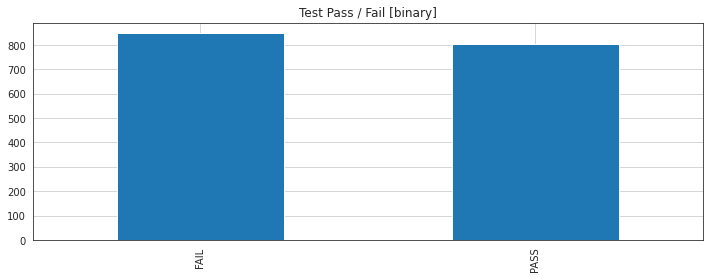

In [ ]:
plt.figure(figsize=(12,4))
df.binary.value_counts().plot(kind='bar')
plt.title('Test Pass / Fail [binary]')
plt.grid()
plt.show()

Explore distribution of films that failed the Bechdel test over the years

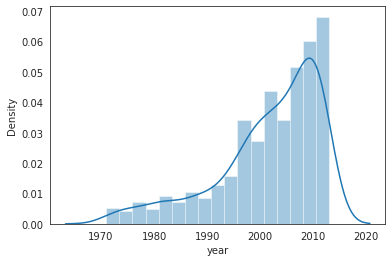

In [ ]:
ax = sns.distplot(fail_df['year'])

And the distribution of films that passed the Bechdel test over the years

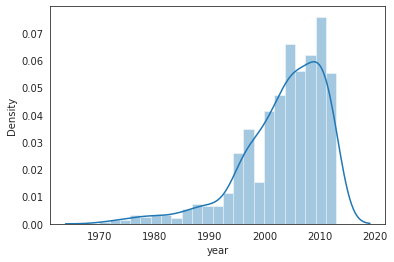

In [ ]:
ax = sns.distplot(pass_df['year'])

Visualize the relationship between two variables (domestic gross and profit)

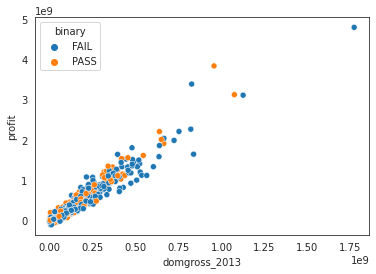

In [ ]:
sns.scatterplot(x='domgross_2013', y='profit', data=df, hue='binary')

This correlation makes sense because as a film's domestic gross increases, it has a direct impact on the profit of the film.

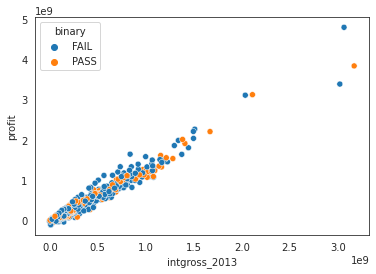

In [ ]:
sns.scatterplot(x='intgross_2013', y='profit', data=df, hue='binary')

The same goes for international gross. As a film earns more internationally, it has an impact on that film's potential profit.

How are budgets distributed across Binaries?

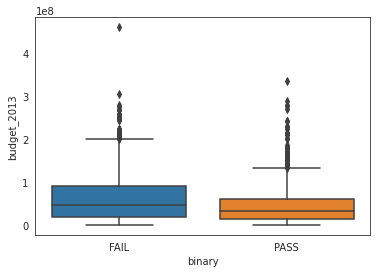

In [ ]:
sns.boxplot(y="budget_2013", x="binary", data=df)

**Clean** **test**

Why do movies fail the Bechdel test?

In [ ]:
fail_df.clean_test.value_counts()

notalk     514
men        194
nowomen    141
Name: clean_test, dtype: int64

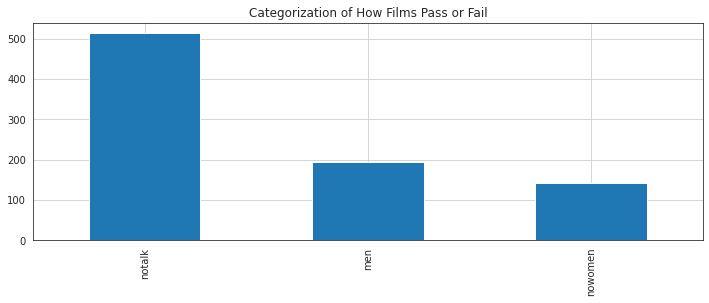

In [ ]:
plt.figure(figsize=(12,4))
fail_df.clean_test.value_counts().plot(kind='bar')
plt.title('Categorization of How Films Pass or Fail')
plt.grid()
plt.show()

The most common reason films fail the Bechdel test is because while they feature women in the cast, those women never speak to each other. The second reason is only men speak in the cast, followed by no women in the cast at all.

**Top Movies**

Limiting lists to the top 20 movies based on their budget, domestic gross, international gross, and profit

In [ ]:
n_top = 20
show_cols = ['year', 'title', 'binary', 'budget_2013', 'domgross_2013', 'intgross_2013', 'profit']

Top 20 Movies by Budget

In [ ]:
df_top_budget = df.nlargest(columns='budget_2013', n=n_top)
df_top_budget[show_cols]

,year,title,binary,budget_2013,domgross_2013,intgross_2013,profit
454,2009,Avatar,FAIL,461435929,825707158,3022588801,3386860030
705,2007,Pirates of the Caribbean: At World's End,PASS,337063045,347647302,1079721346,1090305603
1789,1971,Shaft,FAIL,305063707,404702718,616827003,716466014
1445,1997,Titanic,PASS,290247625,955890356,3171930973,3837573704
121,2012,John Carter,PASS,279025606,74128153,286917566,82020113
158,2012,The Dark Knight Rises,FAIL,279025606,454699213,1095143990,1270817597
393,2010,Tangled,PASS,277740279,214524387,626605502,563389610
83,2013,The Lone Ranger,FAIL,275000000,89289910,259989910,74279820
484,2009,Harry Potter and the Half-Blood Prince,PASS,271432899,327846641,1014525504,1070939246
797,2006,Superman Returns,FAIL,268144752,231297965,451770741,414923954


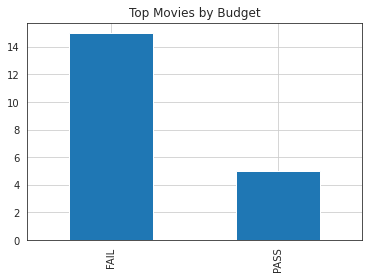

In [ ]:
# plot fail/pass distribution
df_top_budget.binary.value_counts().plot(kind='bar')
plt.title('Top Movies by Budget')
plt.grid()
plt.show()

Only 5 of the movies with the largest budgets pass the Bechdel test, while 15 fail.


---


By Domestic Gross




In [ ]:
df_top_dom = df.nlargest(columns='domgross_2013', n=n_top)
df_top_dom[show_cols]

,year,title,binary,budget_2013,domgross_2013,intgross_2013,profit
1759,1977,Star Wars,FAIL,42274609,1771682790,3066446442,4795854623
1769,1975,Jaws,FAIL,51937204,1125306085,2037236823,3110605704
1783,1973,The Exorcist,PASS,62926730,1074306128,2111900435,3123279833
1445,1997,Titanic,PASS,290247625,955890356,3171930973,3837573704
1784,1973,The Sting,FAIL,28841418,837011132,837011132,1645180846
454,2009,Avatar,FAIL,461435929,825707158,3022588801,3386860030
1735,1980,Star Wars: Episode V - The Empire Strikes Back,FAIL,65038661,820821721,1510514303,2266297363
1787,1972,The Godfather,FAIL,39004975,752051643,1496119403,2209166071
1699,1983,Star Wars: Episode VI - Return of the Jedi,FAIL,76029041,723340482,1339748672,1987060113
1543,1994,The Lion King,FAIL,124633011,664468621,1497608078,2037443688


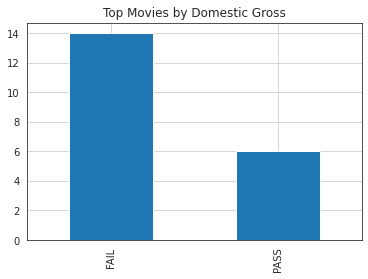

In [ ]:
df_top_dom.binary.value_counts().plot(kind='bar')
plt.title('Top Movies by Domestic Gross')
plt.grid()
plt.show()

Only 6 of the movies with top domestic gross pass the Bechdel test, while 14 fail.


---

By International Gross

In [ ]:
df_top_int = df.nlargest(columns='intgross_2013', n=n_top)
df_top_int[show_cols]

,year,title,binary,budget_2013,domgross_2013,intgross_2013,profit
1445,1997,Titanic,PASS,290247625,955890356,3171930973,3837573704
1759,1977,Star Wars,FAIL,42274609,1771682790,3066446442,4795854623
454,2009,Avatar,FAIL,461435929,825707158,3022588801,3386860030
1783,1973,The Exorcist,PASS,62926730,1074306128,2111900435,3123279833
1769,1975,Jaws,FAIL,51937204,1125306085,2037236823,3110605704
1557,1993,Jurassic Park,PASS,101584911,638063379,1669905770,2206384238
1735,1980,Star Wars: Episode V - The Empire Strikes Back,FAIL,65038661,820821721,1510514303,2266297363
1543,1994,The Lion King,FAIL,124633011,664468621,1497608078,2037443688
1787,1972,The Godfather,FAIL,39004975,752051643,1496119403,2209166071
1060,2003,The Lord of the Rings: The Return of the King,FAIL,119012174,478385772,1445122625,1804496223


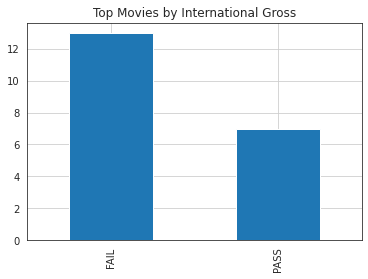

In [ ]:
df_top_int.binary.value_counts().plot(kind='bar')
plt.title('Top Movies by International Gross')
plt.grid()
plt.show()

Only 7 of the movies with top international gross pass the Bechdel test, while 13 fail.


---

By Profit

In [ ]:
df_top_prof = df.nlargest(columns='profit', n=n_top)
df_top_prof[show_cols]

,year,title,binary,budget_2013,domgross_2013,intgross_2013,profit
1759,1977,Star Wars,FAIL,42274609,1771682790,3066446442,4795854623
1445,1997,Titanic,PASS,290247625,955890356,3171930973,3837573704
454,2009,Avatar,FAIL,461435929,825707158,3022588801,3386860030
1783,1973,The Exorcist,PASS,62926730,1074306128,2111900435,3123279833
1769,1975,Jaws,FAIL,51937204,1125306085,2037236823,3110605704
1735,1980,Star Wars: Episode V - The Empire Strikes Back,FAIL,65038661,820821721,1510514303,2266297363
1787,1972,The Godfather,FAIL,39004975,752051643,1496119403,2209166071
1557,1993,Jurassic Park,PASS,101584911,638063379,1669905770,2206384238
1543,1994,The Lion King,FAIL,124633011,664468621,1497608078,2037443688
1748,1978,Grease,PASS,21424236,649203517,1383697739,2011477020


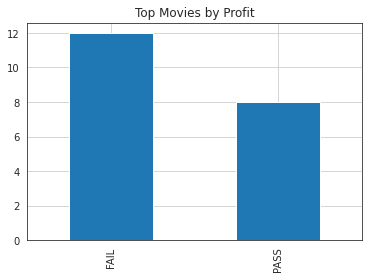

In [ ]:
df_top_prof.binary.value_counts().plot(kind='bar')
plt.title('Top Movies by Profit')
plt.grid()
plt.show()

8 of the most profitable films pass the Bechdel test and 12 fail. This is the highest proportion of all the other top 20 categories.

# Hypothesis Testing

Conducting z-tests on binary variables (Pass/Fail) to determine if there are significant differences between the budget, domestic gross, international gross, and profit of films that fail and pass the Bechdel test.

I chose to limit these z-tests to the top 20 films of each category (budget, domestic gross, international gross, profit).

**Budget Hypothesis Testing**

H₀: µ₁ - µ₂ = 0  
Hₐ: µ₁ - µ₂ ≠ 0  

Limit test to the Top 20 highest budgets of films that fail and pass.

In [ ]:
fail_df_top_budget = fail_df.nlargest(columns='budget_2013', n=n_top)
fail_df_top_budget[show_cols]

,year,title,binary,budget_2013,domgross_2013,intgross_2013,profit
454,2009,Avatar,FAIL,461435929,825707158,3022588801,3386860030
1789,1971,Shaft,FAIL,305063707,404702718,616827003,716466014
158,2012,The Dark Knight Rises,FAIL,279025606,454699213,1095143990,1270817597
83,2013,The Lone Ranger,FAIL,275000000,89289910,259989910,74279820
797,2006,Superman Returns,FAIL,268144752,231297965,451770741,414923954
1523,1995,Waterworld,FAIL,267536405,134909008,403974193,271346796
782,2006,Pirates of the Caribbean: Dead Man's Chest,FAIL,260054178,489266869,1225855881,1455068572
256,2011,Pirates of the Caribbean: On Stranger Tides,FAIL,258922697,249667634,1080913060,1071657997
163,2012,The Hobbit: An Unexpected Journey,FAIL,253659641,307439106,1029557373,1083336838
77,2013,The Hobbit: The Desolation of Smaug,FAIL,250000000,257397516,937397516,944795032


In [ ]:
pass_df_top_budget = pass_df.nlargest(columns='budget_2013', n=n_top)
pass_df_top_budget[show_cols]

,year,title,binary,budget_2013,domgross_2013,intgross_2013,profit
705,2007,Pirates of the Caribbean: At World's End,PASS,337063045,347647302,1079721346,1090305603
1445,1997,Titanic,PASS,290247625,955890356,3171930973,3837573704
121,2012,John Carter,PASS,279025606,74128153,286917566,82020113
393,2010,Tangled,PASS,277740279,214524387,626605502,563389610
484,2009,Harry Potter and the Half-Blood Prince,PASS,271432899,327846641,1014525504,1070939246
632,2008,The Chronicles of Narnia: Prince Caspian,PASS,243507670,153270751,453996009,363759090
822,2006,X-Men: The Last Stand,PASS,242717233,270875277,530926095,559084139
719,2007,The Golden Compass,PASS,230326414,78769081,418222056,266664723
549,2009,Transformers: Revenge of the Fallen,PASS,228003635,436585563,908235868,1116817796
43,2013,Man of Steel,PASS,225000000,291045518,687999518,754045036


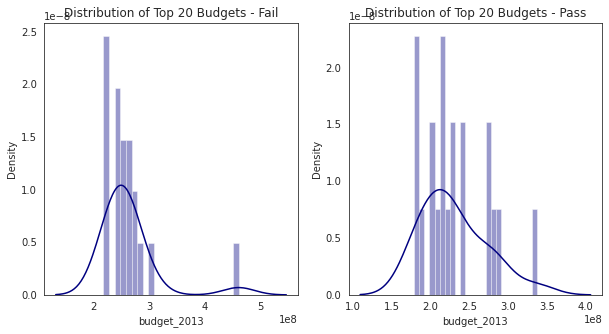

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.distplot(fail_df_top_budget['budget_2013'], bins=24, ax=ax[0], color='navy')
ax[0].set_title('Distribution of Top 20 Budgets - Fail')
sns.distplot(pass_df_top_budget['budget_2013'], bins=24, ax=ax[1], color='navy')
ax[1].set_title('Distribution of Top 20 Budgets - Pass');

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

sm.stats.ztest(x1=fail_df_top_budget['budget_2013'], x2=pass_df_top_budget['budget_2013'])

(2.0301380302058334, 0.0423425107837143)

Reject the hypothesis that there is no significant difference between the overall budget of films that fail or pass the Bechdel test.

The result is significant at the < 0.05 level

p-value  = 0.0423425107837143

In [ ]:
# Calculate the standard error and compute the confidence intervals
#confidence intervals

sample_1_n = fail_df_top_budget.shape[0]
sample_2_n = pass_df_top_budget.shape[0]
sample_1_mean = fail_df_top_budget['budget_2013'].mean()
sample_2_mean = pass_df_top_budget['budget_2013'].mean()
sample_1_var = fail_df_top_budget['budget_2013'].var()
sample_2_var = pass_df_top_budget['budget_2013'].var()

import math

std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

#Cohen's d function

def get_cohens_d(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    s_pooled = math.sqrt((sample_1_var + sample_2_var)/2)
    cohens = (sample_1_mean - sample_2_mean) / s_pooled
    
    return("Cohen's d is: "+str(cohens)+ ".")
  
print(get_cohens_d(fail_df_top_budget['budget_2013'], pass_df_top_budget['budget_2013']))

The difference in means at the 95% confidence interval is between -59965866.851393536 and -1054070.7486064248.
Cohen's d is: 0.6419860139978146.


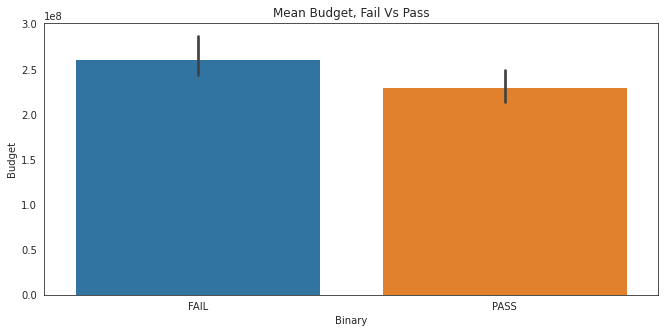

In [ ]:
bechdel_test_bud = pd.concat([fail_df_top_budget, pass_df_top_budget])

plt.figure(figsize = (11,5))
sns.barplot(x="binary", y="budget_2013", data=bechdel_test_bud)
plt.xlabel('Binary')
plt.ylabel('Budget')
plt.title('Mean Budget, Fail Vs Pass');

**Domestic Gross Hypothesis Testing**

H₀: µ₁ - µ₂ = 0  
Hₐ: µ₁ - µ₂ ≠ 0  

Limit test to the Top 20 highest domestic grosses of films that fail and pass.

In [ ]:
fail_df_top_dom = fail_df.nlargest(columns='domgross_2013', n=n_top)
fail_df_top_dom[show_cols]

,year,title,binary,budget_2013,domgross_2013,intgross_2013,profit
1759,1977,Star Wars,FAIL,42274609,1771682790,3066446442,4795854623
1769,1975,Jaws,FAIL,51937204,1125306085,2037236823,3110605704
1784,1973,The Sting,FAIL,28841418,837011132,837011132,1645180846
454,2009,Avatar,FAIL,461435929,825707158,3022588801,3386860030
1735,1980,Star Wars: Episode V - The Empire Strikes Back,FAIL,65038661,820821721,1510514303,2266297363
1787,1972,The Godfather,FAIL,39004975,752051643,1496119403,2209166071
1699,1983,Star Wars: Episode VI - Return of the Jedi,FAIL,76029041,723340482,1339748672,1987060113
1543,1994,The Lion King,FAIL,124633011,664468621,1497608078,2037443688
1755,1977,Close Encounters of the Third Kind,FAIL,76862926,637962288,1297830510,1858929872
1723,1981,Raiders of the Lost Ark,FAIL,51237724,635757611,998945973,1583465860


In [ ]:
pass_df_top_dom = pass_df.nlargest(columns='domgross_2013', n=n_top)
pass_df_top_dom[show_cols]

,year,title,binary,budget_2013,domgross_2013,intgross_2013,profit
1783,1973,The Exorcist,PASS,62926730,1074306128,2111900435,3123279833
1445,1997,Titanic,PASS,290247625,955890356,3171930973,3837573704
1315,1999,Star Wars: Episode I - The Phantom Menace,PASS,160823133,663632711,1408313741,1911123319
1748,1978,Grease,PASS,21424236,649203517,1383697739,2011477020
1557,1993,Jurassic Park,PASS,101584911,638063379,1669905770,2206384238
980,2004,Shrek 2,PASS,86323501,544117065,1155511754,1613305318
1460,1996,Independence Day,PASS,111387369,454711839,1213975115,1557299585
549,2009,Transformers: Revenge of the Fallen,PASS,228003635,436585563,908235868,1116817796
79,2013,The Hunger Games: Catching Fire,PASS,130000000,424088260,857088260,1151176520
1169,2001,Harry Potter and the Sorcerer's Stone,PASS,164480745,417880504,1282627914,1536027673


In [ ]:
sm.stats.ztest(x1=fail_df_top_dom['domgross_2013'], x2=pass_df_top_dom['domgross_2013'])

(2.49702573911316, 0.012523986585048838)

Reject the hypothesis that there is no significant difference between the domestic gross of films that fail or pass the Bechdel test.

The result is significant at the < 0.05 level. 

p-value = 0.012523986585048838

In [ ]:
# Calculate the standard error and compute the confidence intervals
#confidence intervals

sample_1_n = fail_df_top_dom.shape[0]
sample_2_n = pass_df_top_dom.shape[0]
sample_1_mean = fail_df_top_dom['domgross_2013'].mean()
sample_2_mean = pass_df_top_dom['domgross_2013'].mean()
sample_1_var = fail_df_top_dom['domgross_2013'].var()
sample_2_var = pass_df_top_dom['domgross_2013'].var()

import math

std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

#Cohen's d function

def get_cohens_d(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    s_pooled = math.sqrt((sample_1_var + sample_2_var)/2)
    cohens = (sample_1_mean - sample_2_mean) / s_pooled
    
    return("Cohen's d is: "+str(cohens)+ ".")
  
print(get_cohens_d(fail_df_top_dom['domgross_2013'], pass_df_top_dom['domgross_2013']))

The difference in means at the 95% confidence interval is between -361063370.5614855 and -43504420.838514596.
Cohen's d is: 0.7896288711662981.


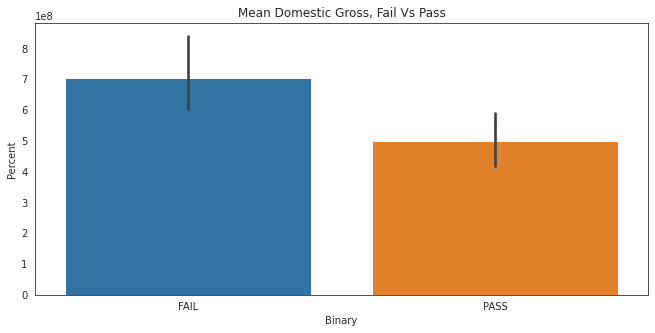

In [ ]:
bechdel_test_dom = pd.concat([fail_df_top_dom, pass_df_top_dom])

plt.figure(figsize = (11,5))
sns.barplot(x="binary", y="domgross_2013", data=bechdel_test_dom)
plt.xlabel('Binary')
plt.ylabel('Percent')
plt.title('Mean Domestic Gross, Fail Vs Pass');

**International Gross Hypothesis Testing**

H₀: µ₁ - µ₂ = 0  
Hₐ: µ₁ - µ₂ ≠ 0  

Limit test to the Top 20 highest international grosses of films that fail and pass.

In [ ]:
fail_df_top_int = fail_df.nlargest(columns='intgross_2013', n=n_top)
fail_df_top_int[show_cols]

,year,title,binary,budget_2013,domgross_2013,intgross_2013,profit
1759,1977,Star Wars,FAIL,42274609,1771682790,3066446442,4795854623
454,2009,Avatar,FAIL,461435929,825707158,3022588801,3386860030
1769,1975,Jaws,FAIL,51937204,1125306085,2037236823,3110605704
1735,1980,Star Wars: Episode V - The Empire Strikes Back,FAIL,65038661,820821721,1510514303,2266297363
1543,1994,The Lion King,FAIL,124633011,664468621,1497608078,2037443688
1787,1972,The Godfather,FAIL,39004975,752051643,1496119403,2209166071
1060,2003,The Lord of the Rings: The Return of the King,FAIL,119012174,478385772,1445122625,1804496223
219,2011,Harry Potter and the Deathly Hallows: Part 2,FAIL,129461348,394609809,1375512553,1640661014
1699,1983,Star Wars: Episode VI - Return of the Jedi,FAIL,76029041,723340482,1339748672,1987060113
1755,1977,Close Encounters of the Third Kind,FAIL,76862926,637962288,1297830510,1858929872


In [ ]:
pass_df_top_int = pass_df.nlargest(columns='intgross_2013', n=n_top) 
pass_df_top_int[show_cols]

,year,title,binary,budget_2013,domgross_2013,intgross_2013,profit
1445,1997,Titanic,PASS,290247625,955890356,3171930973,3837573704
1783,1973,The Exorcist,PASS,62926730,1074306128,2111900435,3123279833
1557,1993,Jurassic Park,PASS,101584911,638063379,1669905770,2206384238
1315,1999,Star Wars: Episode I - The Phantom Menace,PASS,160823133,663632711,1408313741,1911123319
1748,1978,Grease,PASS,21424236,649203517,1383697739,2011477020
1169,2001,Harry Potter and the Sorcerer's Stone,PASS,164480745,417880504,1282627914,1536027673
1460,1996,Independence Day,PASS,111387369,454711839,1213975115,1557299585
299,2011,Transformers: Dark of the Moon,PASS,201959703,364967639,1163903170,1326911106
980,2004,Shrek 2,PASS,86323501,544117065,1155511754,1613305318
1097,2002,Harry Potter and the Chamber of Secrets,PASS,129517922,339321257,1138436153,1348239488


In [ ]:
sm.stats.ztest(x1=fail_df_top_int['intgross_2013'], x2=pass_df_top_int['intgross_2013'])

(0.9950501605413378, 0.3197118688219186)

Fail to reject the null hypothesis, there is no significant difference between the international gross of films that fail or pass the Bechdel test.
Results not stastically significant at p-value > 0.05

p-value = 0.3197118688219186

In [ ]:
# Calculate the standard error and compute the confidence intervals
#confidence intervals

sample_1_n = fail_df_top_int.shape[0]
sample_2_n = pass_df_top_int.shape[0]
sample_1_mean = fail_df_top_int['intgross_2013'].mean()
sample_2_mean = pass_df_top_int['intgross_2013'].mean()
sample_1_var = fail_df_top_int['intgross_2013'].var()
sample_2_var = pass_df_top_int['intgross_2013'].var()

import math

std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

#Cohen's d function

def get_cohens_d(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    s_pooled = math.sqrt((sample_1_var + sample_2_var)/2)
    cohens = (sample_1_mean - sample_2_mean) / s_pooled
    
    return("Cohen's d is: "+str(cohens)+ ".")
  
print(get_cohens_d(fail_df_top_int['intgross_2013'], pass_df_top_int['intgross_2013']))

The difference in means at the 95% confidence interval is between -522429107.4627725 and 170595372.6627723.
Cohen's d is: 0.3146624893426831.


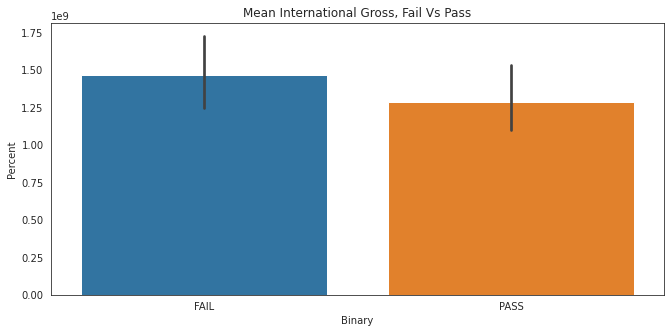

In [ ]:
bechdel_test = pd.concat([fail_df_top_int, pass_df_top_int])

plt.figure(figsize = (11,5))
sns.barplot(x="binary", y="intgross_2013", data=bechdel_test)
plt.xlabel('Binary')
plt.ylabel('Percent')
plt.title('Mean International Gross, Fail Vs Pass');

**Profit Hypothesis Testing**

H₀: µ₁ - µ₂ = 0  
Hₐ: µ₁ - µ₂ ≠ 0  

Limit test to the Top 20 highest profits of films that fail and pass.

In [ ]:
fail_df_top_prof = fail_df.nlargest(columns='profit', n=n_top)
fail_df_top_prof[show_cols]

,year,title,binary,budget_2013,domgross_2013,intgross_2013,profit
1759,1977,Star Wars,FAIL,42274609,1771682790,3066446442,4795854623
454,2009,Avatar,FAIL,461435929,825707158,3022588801,3386860030
1769,1975,Jaws,FAIL,51937204,1125306085,2037236823,3110605704
1735,1980,Star Wars: Episode V - The Empire Strikes Back,FAIL,65038661,820821721,1510514303,2266297363
1787,1972,The Godfather,FAIL,39004975,752051643,1496119403,2209166071
1543,1994,The Lion King,FAIL,124633011,664468621,1497608078,2037443688
1699,1983,Star Wars: Episode VI - Return of the Jedi,FAIL,76029041,723340482,1339748672,1987060113
1755,1977,Close Encounters of the Third Kind,FAIL,76862926,637962288,1297830510,1858929872
1060,2003,The Lord of the Rings: The Return of the King,FAIL,119012174,478385772,1445122625,1804496223
1784,1973,The Sting,FAIL,28841418,837011132,837011132,1645180846


In [ ]:
pass_df_top_prof = pass_df.nlargest(columns='profit', n=n_top)
pass_df_top_prof[show_cols]

,year,title,binary,budget_2013,domgross_2013,intgross_2013,profit
1445,1997,Titanic,PASS,290247625,955890356,3171930973,3837573704
1783,1973,The Exorcist,PASS,62926730,1074306128,2111900435,3123279833
1557,1993,Jurassic Park,PASS,101584911,638063379,1669905770,2206384238
1748,1978,Grease,PASS,21424236,649203517,1383697739,2011477020
1315,1999,Star Wars: Episode I - The Phantom Menace,PASS,160823133,663632711,1408313741,1911123319
980,2004,Shrek 2,PASS,86323501,544117065,1155511754,1613305318
1460,1996,Independence Day,PASS,111387369,454711839,1213975115,1557299585
1169,2001,Harry Potter and the Sorcerer's Stone,PASS,164480745,417880504,1282627914,1536027673
1097,2002,Harry Potter and the Chamber of Secrets,PASS,129517922,339321257,1138436153,1348239488
299,2011,Transformers: Dark of the Moon,PASS,201959703,364967639,1163903170,1326911106


In [ ]:
sm.stats.ztest(x1=fail_df_top_prof['profit'], x2=pass_df_top_prof['profit'])

(1.5197640898653804, 0.12857027739176233)

Fail to reject the null hypothesis, there is no significant difference between the profit of films that fail or pass the Bechdel test.
Results not statistically significant at the p-value > 0.05 

p-value = 0.12857027739176233

In [ ]:
# Calculate the standard error and compute the confidence intervals
#confidence intervals

sample_1_n = fail_df_top_prof.shape[0]
sample_2_n = pass_df_top_prof.shape[0]
sample_1_mean = fail_df_top_prof['intgross_2013'].mean()
sample_2_mean = pass_df_top_prof['intgross_2013'].mean()
sample_1_var = fail_df_top_prof['intgross_2013'].var()
sample_2_var = pass_df_top_prof['intgross_2013'].var()

import math

std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

#Cohen's d function

def get_cohens_d(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    s_pooled = math.sqrt((sample_1_var + sample_2_var)/2)
    cohens = (sample_1_mean - sample_2_mean) / s_pooled
    
    return("Cohen's d is: "+str(cohens)+ ".")
  
print(get_cohens_d(fail_df_top_prof['intgross_2013'], pass_df_top_prof['intgross_2013']))

The difference in means at the 95% confidence interval is between -532013326.0859525 and 183544912.7859528.
Cohen's d is: 0.30183840878762414.


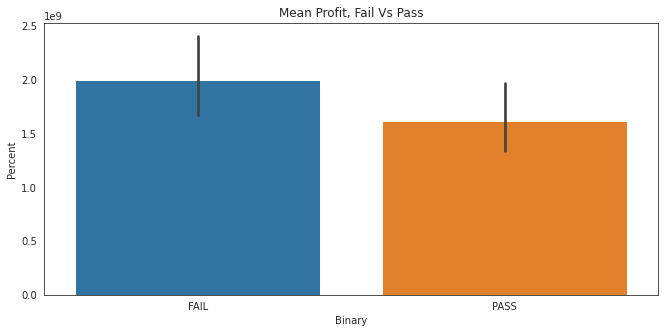

In [ ]:
bechdel_test_prof = pd.concat([fail_df_top_prof, pass_df_top_prof])

plt.figure(figsize = (11,5))
sns.barplot(x="binary", y="profit", data=bechdel_test_prof)
plt.xlabel('Binary')
plt.ylabel('Percent')
plt.title('Mean Profit, Fail Vs Pass');

# Conclusion
*   Budget: There is a significant difference in the budget of films that pass or fail the Bechdel test.
*   Domestic gross: There is a significant difference in the domestic gross of films that pass or fail the Bechdel test.
*   International gross: Failed to reject the null hypothesis. There is no significant difference between the international gross of films that pass or fail the Bechdel test.
*   Profit: Failed to reject the null hypothesis. There is no significant difference between the profit of films that pass or fail the Bechdel test.

I'm not too surprised on my findings. I did expect that Hollywood studios would be more willing to expend larger budgets on films that are more male-centered so the significant difference in budget result was not surprising. 

With this analysis, I hope that studios are more inclined to produce films with more prominent women casts. There is no significant difference in the films profits and if a more inclusive solution is available, I believe that should be the road taken.

This dataset is from 2013, so I would like to continue my research and analyze more recent films that pass or fail the Bechdel test especailly since more superhero franchise movies have been directed by women. I feel as if there is more proof that films that center women in the cast are profitable and that investing in them is always a worthwhile endeavor.



